In [ ]:
%matplotlib inline


# Balance model complexity and cross-validated score


This example balances model complexity and cross-validated score by
finding a decent accuracy within 1 standard deviation of the best accuracy
score while minimising the number of PCA components [1].

The figure shows the trade-off between cross-validated score and the number
of PCA components. The balanced case is when n_components=6 and accuracy=0.80,
which falls into the range within 1 standard deviation of the best accuracy
score.

[1] Hastie, T., Tibshirani, R.,, Friedman, J. (2001). Model Assessment and
Selection. The Elements of Statistical Learning (pp. 219-260). New York,
NY, USA: Springer New York Inc..



In [1]:
# Author: Wenhao Zhang <wenhaoz@ucla.edu>

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


def lower_bound(cv_results):
    """
    Calculate the lower bound within 1 standard deviation
    of the best `mean_test_scores`.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`

    Returns
    -------
    float
        Lower bound within 1 standard deviation of the
        best `mean_test_score`.
    """
    best_score_idx = np.argmax(cv_results['mean_test_score'])

    return (cv_results['mean_test_score'][best_score_idx]
            - cv_results['std_test_score'][best_score_idx])


def best_low_complexity(cv_results):
    """
    Balance model complexity with cross-validated score.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`.

    Return
    ------
    int
        Index of a model that has the fewest PCA components
        while has its test score within 1 standard deviation of the best
        `mean_test_score`.
    """
    threshold = lower_bound(cv_results)
    candidate_idx = np.flatnonzero(cv_results['mean_test_score'] >= threshold)
    best_idx = candidate_idx[cv_results['param_reduce_dim__n_components']
                             [candidate_idx].argmin()]
    return best_idx


pipe = Pipeline([
        ('reduce_dim', PCA(random_state=42)),
        ('classify', LinearSVC(random_state=42)),
])

param_grid = {
    'reduce_dim__n_components': [2, 4, 6, 8]
}

grid = GridSearchCV(pipe, cv=10, n_jobs=1, param_grid=param_grid,
                    scoring='accuracy', refit=best_low_complexity)
digits = load_digits()
grid.fit(digits.data, digits.target)

n_components = grid.cv_results_['param_reduce_dim__n_components']
test_scores = grid.cv_results_['mean_test_score']

plt.figure()
plt.bar(n_components, test_scores, width=1.3, color='b')

lower = lower_bound(grid.cv_results_)
plt.axhline(np.max(test_scores), linestyle='--', color='y',
            label='Best score')
plt.axhline(lower, linestyle='--', color='.5', label='Best score - 1 std')

plt.title("Balance model complexity and cross-validated score")
plt.xlabel('Number of PCA components used')
plt.ylabel('Digit classification accuracy')
plt.xticks(n_components.tolist())
plt.ylim((0, 1.0))
plt.legend(loc='upper left')

best_index_ = grid.best_index_

print("The best_index_ is %d" % best_index_)
print("The n_components selected is %d" % n_components[best_index_])
print("The corresponding accuracy score is %.2f"
      % grid.cv_results_['mean_test_score'][best_index_])
plt.show()

Automatically created module for IPython interactive environment


C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklear

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklear

The best_index_ is 3
The n_components selected is 8
The corresponding accuracy score is 0.84


C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<Figure size 640x480 with 1 Axes>

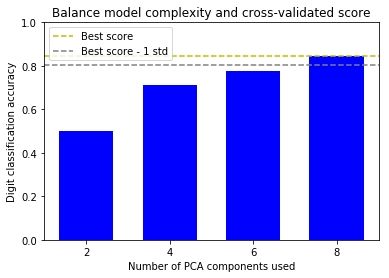

In [2]:
plt.figure()
plt.bar(n_components, test_scores, width=1.3, color='b')

lower = lower_bound(grid.cv_results_)
plt.axhline(np.max(test_scores), linestyle='--', color='y',
            label='Best score')
plt.axhline(lower, linestyle='--', color='.5', label='Best score - 1 std')

plt.title("Balance model complexity and cross-validated score")
plt.xlabel('Number of PCA components used')
plt.ylabel('Digit classification accuracy')
plt.xticks(n_components.tolist())
plt.ylim((0, 1.0))
plt.legend(loc='upper left')

In [3]:
PCA(random_state=42)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)